# STEP 1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

YOU WORK AS DATA SCEINTIST. HR DEPARTEMENT REQUESTED TO MAKE PREDICTION OF EMOPLOYEE WHO CAN LEAVE COMPANY. SINCE HIRING OF NEW EMPLOYEE COST COMPANY AND TAKE 6 MONTH TO COMPLETE THE WHOLE PROCESS

# STEP 2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Manager\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# You have to include the full link to the csv file containing your dataset
df = pd.read_csv('employee.csv')
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1365,29,Yes,Travel_Frequently,746,Sales,24,3,Technical Degree,1,1928,...,4,80,0,1,3,3,1,0,0,0
796,25,Yes,Travel_Rarely,1219,Research & Development,4,1,Technical Degree,1,1106,...,2,80,1,7,3,4,7,7,5,6
1291,37,Yes,Travel_Rarely,370,Research & Development,10,4,Medical,1,1809,...,2,80,0,10,4,1,10,3,0,8
1116,55,No,Travel_Rarely,685,Sales,26,5,Marketing,1,1578,...,3,80,1,36,3,3,36,6,2,13
23,21,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,30,...,4,80,0,0,6,3,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### We also now know which features are catogerical.

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### .describe() gives us a lot of information. For example now I know the average age group of employess in this company which is around 37.

In [5]:
# Let's replace 'Attrition' , 'overtime' , 'Over18' column with integers before performing any visualizations 
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x:1 if x == 'Y' else 0)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<AxesSubplot:>

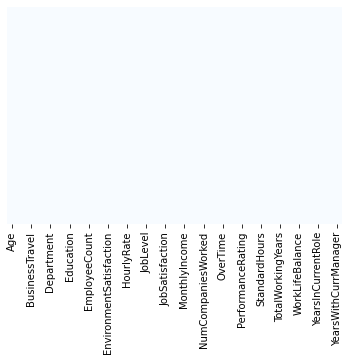

In [6]:
# Let's see if we have any missing data.
sns.heatmap(df.isnull(),cmap = 'Blues', cbar = False, yticklabels = False)

### Luckily we do not have any missing values. :)

# STEP 3: VISUALIZE DATASET

### Now lets plot a histogram of all the features together and analyse some important features

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

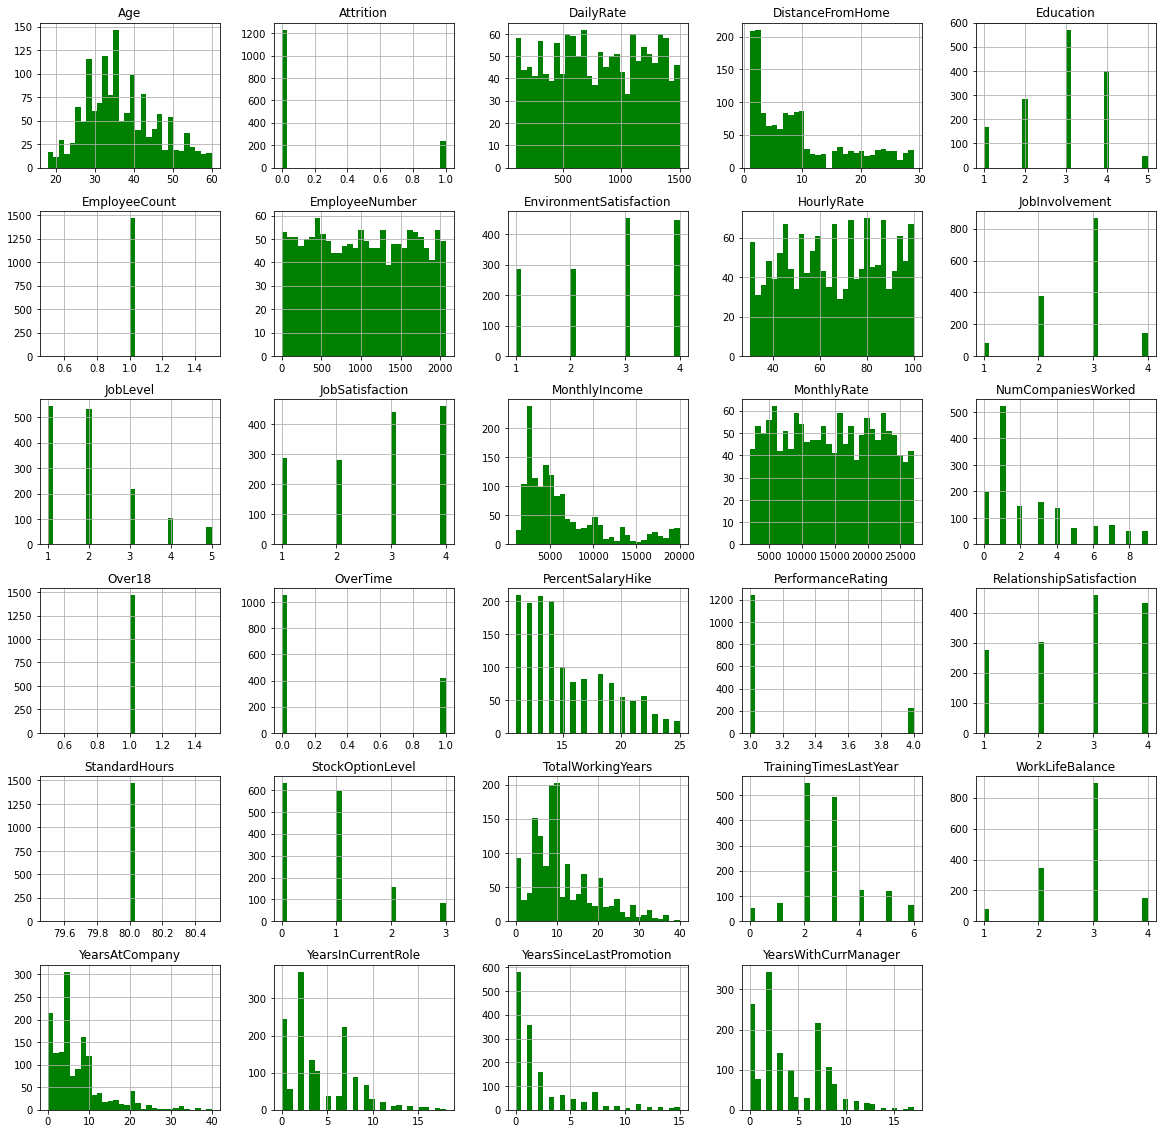

In [7]:
df.hist(bins=30,figsize=(20,20),color='g')

### Above histogram gives a better understanding of some of variable. All this by a simple .hist command

In [8]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
# use inplace = True to change the values in memory.

df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis = 1, inplace = True)

In [9]:
# Let's see how many employees left the company! 
left_df = df[df['Attrition'] == 1]
stayed_df = df[df['Attrition'] == 0]

In [10]:
print('1. Total = {} '.format(len(df)))
print('2. Number of employees left the company = {}'.format(len(left_df)))
print('3. Percentage of employees left the company = {}'.format((len(left_df)/len(df))*100))
print('4. Number of employees who stayed in the company = {}'.format(len(stayed_df)))
print('5. Percentage of employees stayed the company = {}'.format((len(stayed_df)/len(df))*100))

1. Total = 1470 
2. Number of employees left the company = 237
3. Percentage of employees left the company = 16.122448979591837
4. Number of employees who stayed in the company = 1233
5. Percentage of employees stayed the company = 83.87755102040816


In [11]:
#  Let's compare the mean and std of the employees who stayed and left 
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [12]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

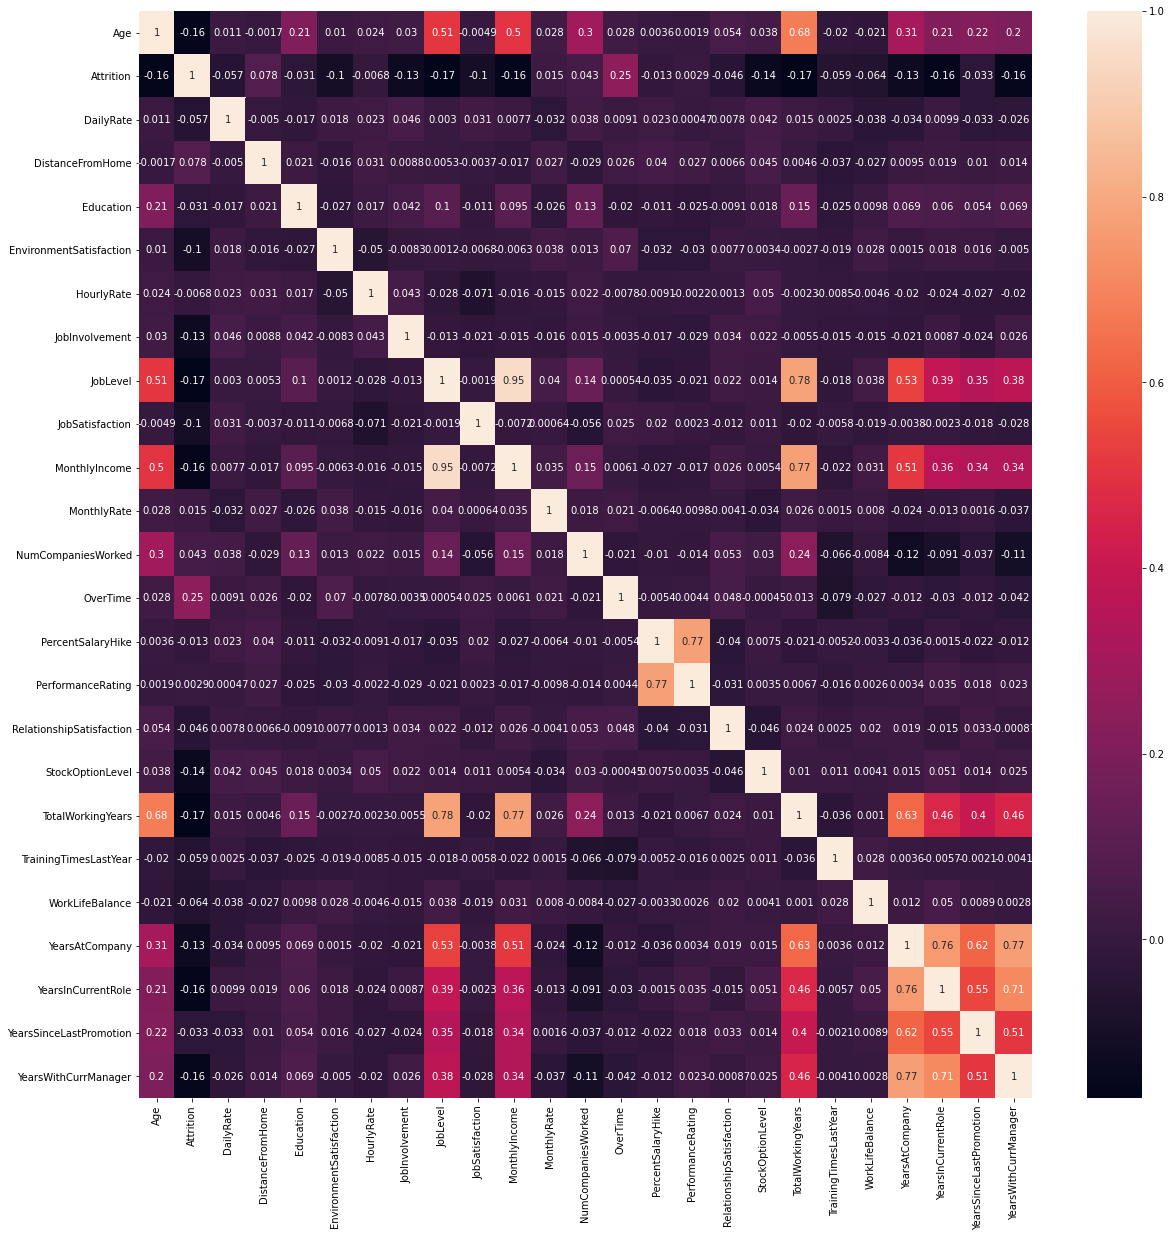

In [13]:
correlations = df.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

#### -Job level is strongly correlated with total working years
#### -Monthly income is strongly correlated with Job level
#### -Monthly income is strongly correlated with total working hours
#### -Age is stongly correlated with monthly income
#### -Also we can see that overtime has a strong affect on Attrition


### Now lets see what age group tent to leave the company more.

<AxesSubplot:xlabel='Age', ylabel='count'>

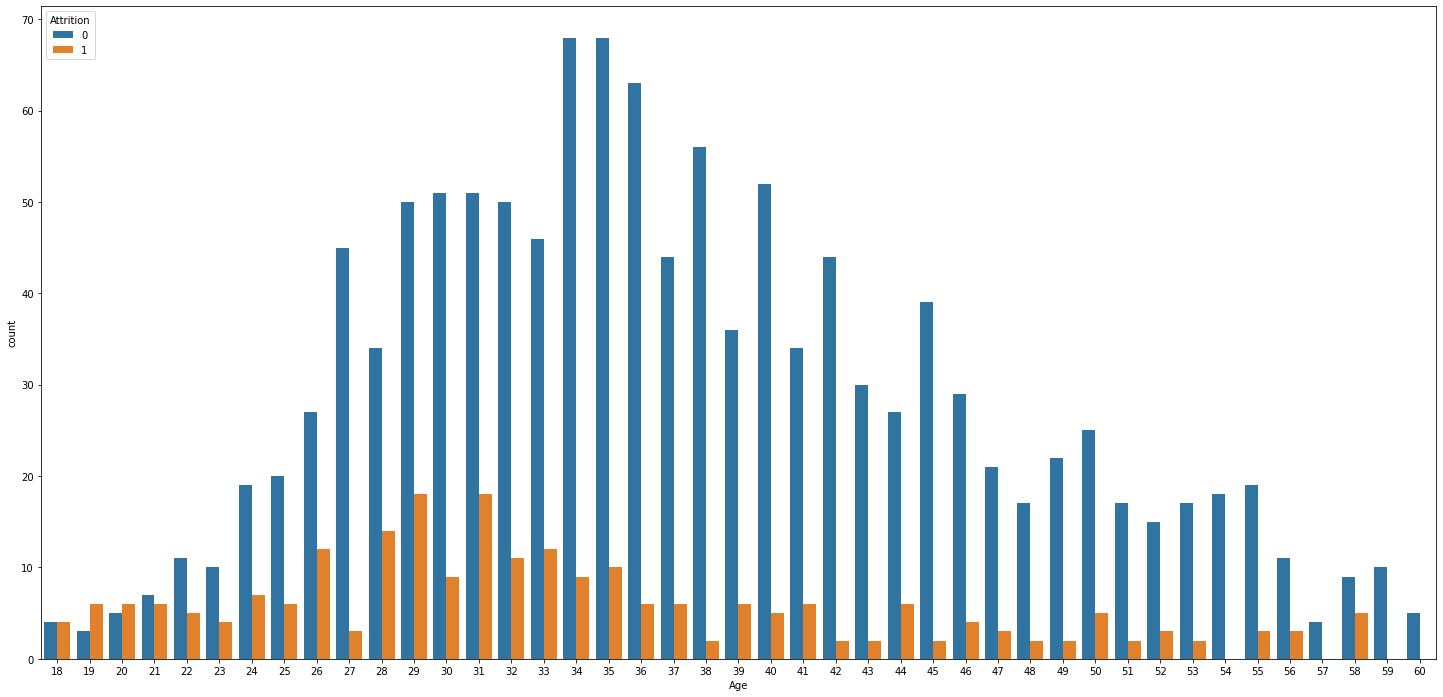

In [14]:
plt.figure(figsize=(25,12))
sns.countplot(x = 'Age', hue = 'Attrition', data = df)

#### We can see that the age group between 28 to 31 have left the most

### Lets explore more

<AxesSubplot:xlabel='OverTime', ylabel='count'>

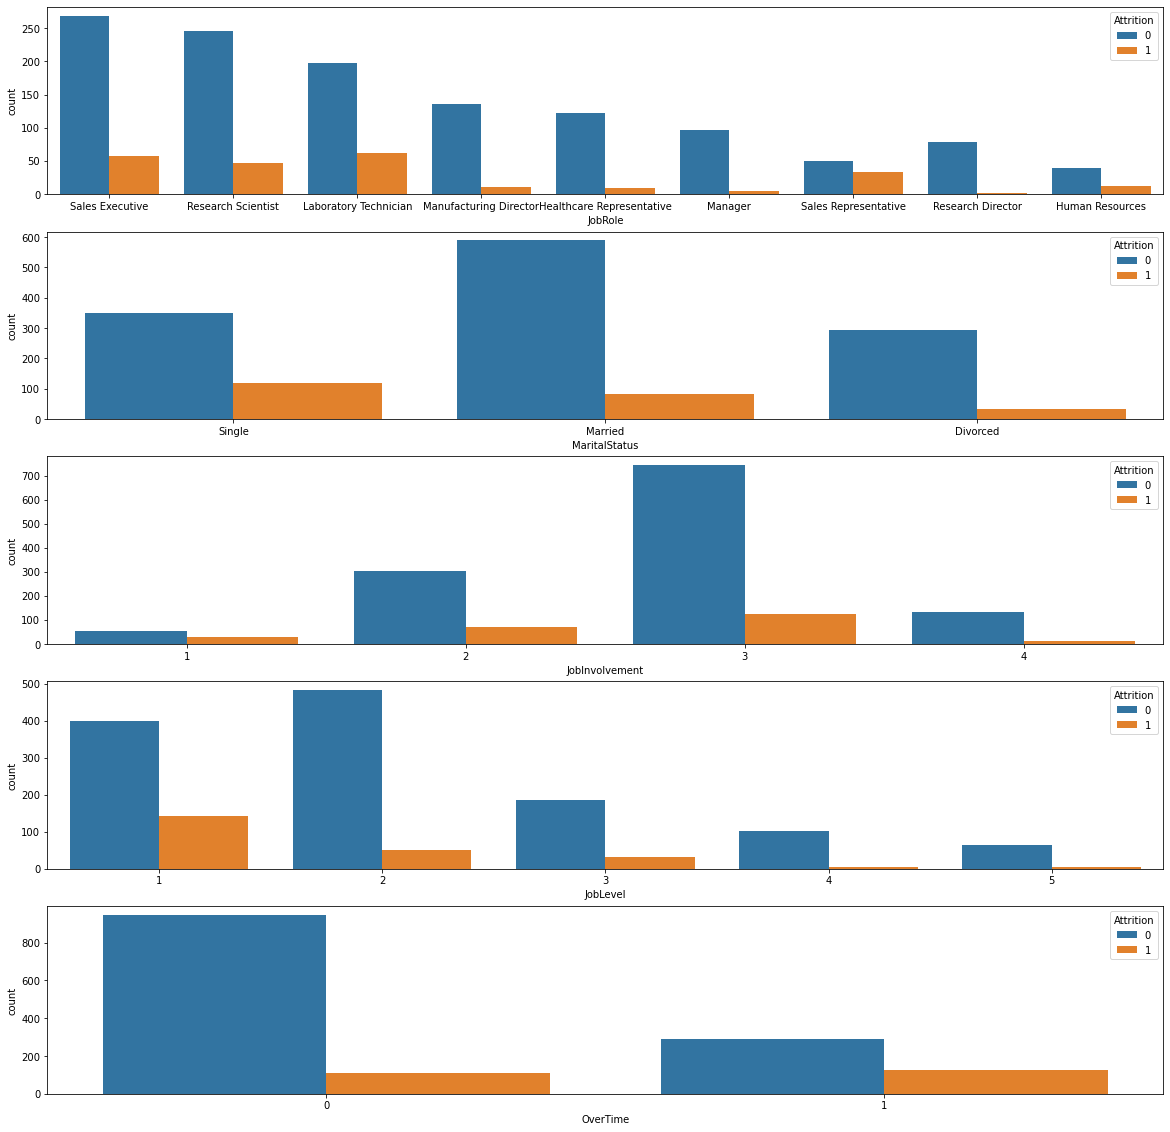

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(511)
sns.countplot(x = 'JobRole',hue = 'Attrition', data=df)
plt.subplot(512)
sns.countplot(x = 'MaritalStatus',hue = 'Attrition', data=df)
plt.subplot(513)
sns.countplot(x = 'JobInvolvement',hue = 'Attrition', data=df)
plt.subplot(514)
sns.countplot(x = 'JobLevel',hue = 'Attrition', data=df)
plt.subplot(515)
sns.countplot(x = 'OverTime',hue = 'Attrition', data=df)

#### -Sales Representitives tend to leave compared to any other job 
#### -Single employees tend to leave compared to married and divorced
#### -Less involved employees tend to leave the company 
#### - experienced (low job level) tend to leave the company 

### Lets do some more visualizations, but now for continuous values

Text(0.5, 0, 'Distance from home')

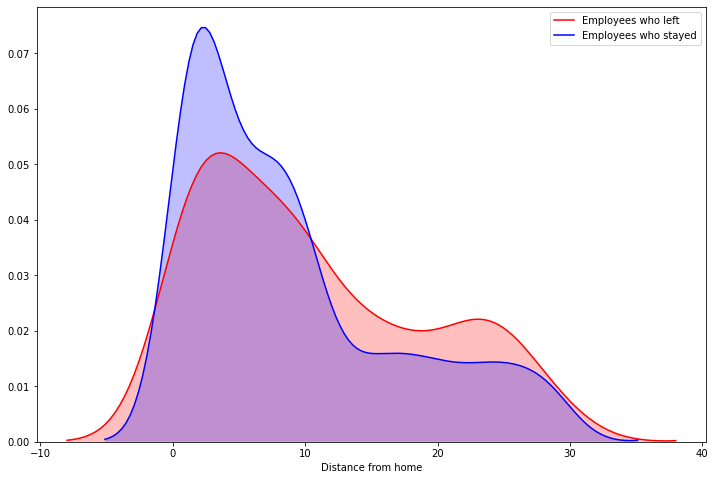

In [16]:
plt.figure(figsize = (12,8))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', color = 'r', shade = True)
sns.kdeplot(stayed_df['DistanceFromHome'],label='Employees who stayed',color = 'b',shade=True)
plt.xlabel('Distance from home')

### As we can see, as the distance increases the employees tend to leave more as compared to who stayed.

Text(0.5, 1.0, 'Number of years with the current manager v/s Atrition')

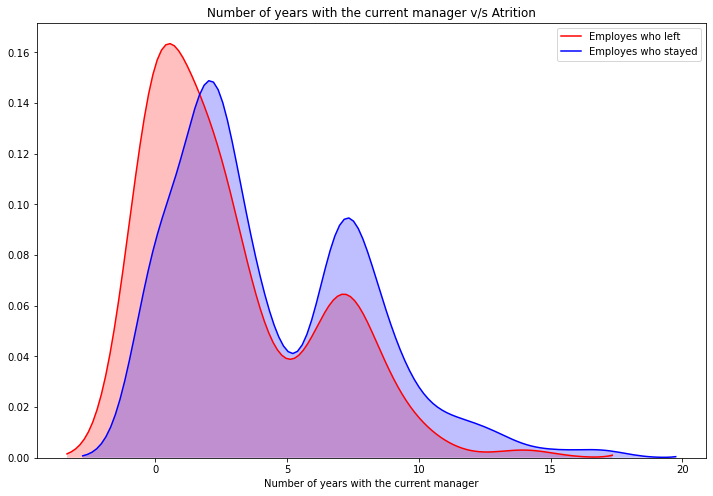

In [17]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['YearsWithCurrManager'],shade=True,color='r',label='Employes who left')
sns.kdeplot(stayed_df['YearsWithCurrManager'],shade=True,color='b',label='Employes who stayed')

plt.xlabel('Number of years with the current manager')
plt.title('Number of years with the current manager v/s Atrition')

#### As seen that in early time with the manager, emloyees tend to leave more than staying but with time passing by the employees tend to stay.

Text(0.5, 1.0, 'Number of total working years v/s Attrition')

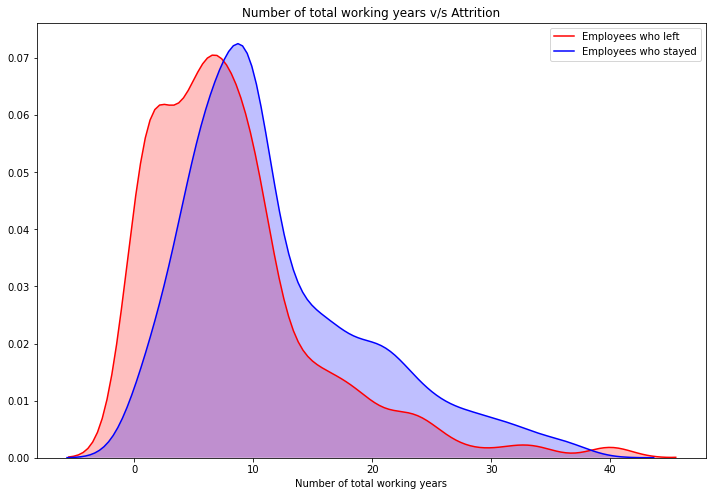

In [18]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['TotalWorkingYears'],label='Employees who left',shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'],label='Employees who stayed',shade = True, color = 'b')

plt.xlabel('Number of total working years')
plt.title('Number of total working years v/s Attrition')

#### Interesting to see the trend that a lot of employees leave between 7 to 10 years of working

### Lets create some boxplot for more visualizations

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

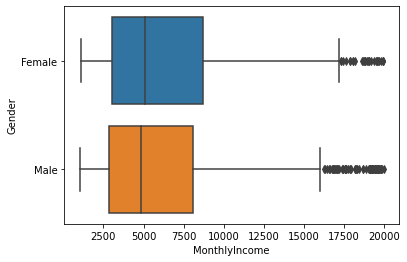

In [19]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x='MonthlyIncome',y='Gender',data=df)

### Nice to see the gender equality here. Infact female tend to get more salaries here.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

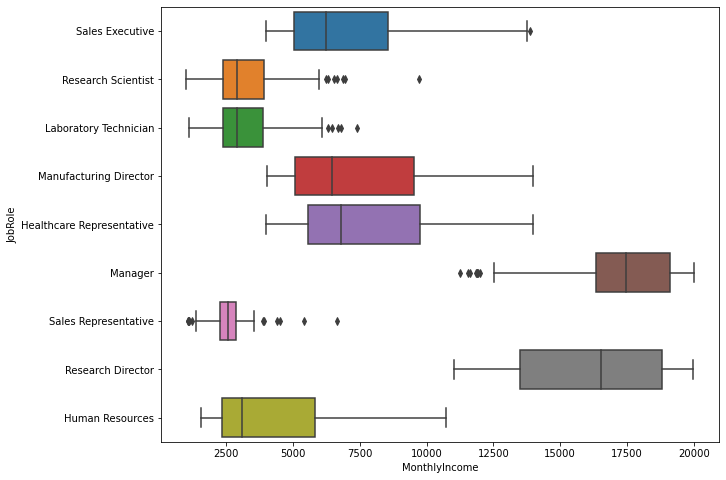

In [20]:
# Let's see the Jod role vs. Monthly Income
plt.figure(figsize=(10,8))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=df)

#### No doubt why we saw sales representatives leaving the job a lot in my earlier visualizations.

# STEP 4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

#### Handling the catogerical variables.
First we select them, then we transform them.

In [21]:
cat_var = [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] 
cat_var

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [22]:
X_cat = df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]
X_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [23]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()


In [24]:
X_cat = pd.DataFrame(X_cat)
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Selecting all the numerical values

In [25]:
numeric_var = [key for key in dict(df.dtypes)
                   if dict(df.dtypes)[key]
                       in ['float64','float32','int32','int64']]
numeric_var

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [26]:
X_numerical = df[['Age','Attrition','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [27]:
X_all = pd.concat([X_cat,X_numerical],axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


In [28]:
# I will now drop the target variable 'Attrition'
X_all.drop('Attrition',axis=1,inplace=True)
X_all.shape

(1470, 50)

### Now I will be scaling down all the values so that we can feed it to our ML models

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X_all)
scaled_data

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [30]:
y = df['Attrition']
y.shape

(1470,)

# STEP 5: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER
MODEL-1

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X_all,y,test_size = 0.25, random_state=43)

In [33]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
LR_pred = model_LR.predict(X_test)
print('The accuracy score for Logistic Regression is: {}'.format(100*accuracy_score(LR_pred,y_test)))

C:\Users\Manager\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy score for Logistic Regression is: 83.69565217391305


<AxesSubplot:>

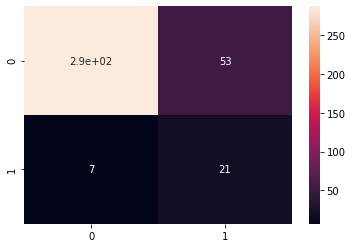

In [34]:
cm = confusion_matrix(LR_pred,y_test)
sns.heatmap(cm,annot=True)

In [35]:
print(classification_report(LR_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       340
           1       0.28      0.75      0.41        28

    accuracy                           0.84       368
   macro avg       0.63      0.80      0.66       368
weighted avg       0.92      0.84      0.87       368



### As seen I got a good recall score with Logistic but my precision score for those who will leave is not good.


# STEP 6: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER
MODEL-2

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=50)

In [37]:
model_RF.fit(X_train,y_train)
RF_pred = model_RF.predict(X_test)
print('The accuracy score for Random Forest is: {}'.format(100*accuracy_score(RF_pred,y_test)))

The accuracy score for Random Forest is: 80.97826086956522


<AxesSubplot:>

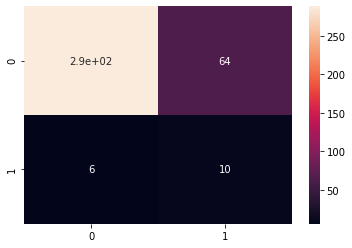

In [38]:
# Testing Set Performance
cm = confusion_matrix(RF_pred,y_test)
sns.heatmap(cm,annot=True)

In [39]:
print(classification_report(RF_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       352
           1       0.14      0.62      0.22        16

    accuracy                           0.81       368
   macro avg       0.56      0.72      0.56       368
weighted avg       0.94      0.81      0.86       368



### With Random Forest my precission score for employees who will leave is not so good.

NOW ENHANCE THE PERFORMANCE OF THE MODEL.


USE OPTIMIZATION
WE WILL USE RandomizedSearchCV

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
from scipy.stats import randint

In [45]:
est=RandomForestClassifier(n_jobs=-1)

In [46]:
rf_p={'bootstrap':[True,False], 
      'criterion':['gini','entropy'], 
      'max_depth':[3,5,10,None], 
      'max_features':randint(1,50),   
     'n_estimators':[10,20,30] 
      }

In [50]:
def hyper_tuning(est,p,n):
    randsearch=RandomizedSearchCV(est,param_distributions=p,n_jobs=-1,n_iter=n,cv=10)
    randsearch.fit(X_train,y_train)
    ht_p=randsearch.best_params_
    ht_s=randsearch.best_score_
    return ht_p,ht_s

In [51]:
#X_all.dtypes

In [52]:
rf_parameter,rf_score=hyper_tuning(est,rf_p,10)

In [53]:
print(rf_parameter)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 49, 'n_estimators': 10}


In [54]:
print(rf_score)

0.8693284936479129


USE THESE PARAMETER FOR BETTER PERFORMANCE OF THE MODEL

In [55]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(bootstrap= True, criterion='gini', max_depth= 5, max_features= 49, n_estimators=10,random_state=50)

In [65]:
# model_RF.fit(X_train,y_train)
RF_pred = model_RF.predict(X_test)
print('The accuracy score for Random Forest is: {}'.format(100*accuracy_score(RF_pred,y_test)))

The accuracy score for Random Forest is: 83.15217391304348


In [57]:
print(classification_report(RF_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       348
           1       0.22      0.80      0.34        20

    accuracy                           0.83       368
   macro avg       0.60      0.82      0.62       368
weighted avg       0.94      0.83      0.87       368



# Conclusion

#### After applying hyperparameter tuning, performance of the matrix has improved.But its not better than the logistics regression.

#### In this notebook I did some EDA and visualized the data with the help of plt and sns. I used Logistic Regression, Random Forest & later tuning technique. Each of them had good accuracy. 
### But This is a mistake I see a lot of people doing.
#### Hence I want to address here. A good accuracy score is not enough to evaluate the performance of your model. It can actually mislead you sometimes. A real world model should have a good precision & recall score too. Hence its always a good practice to draw a confusion matrix and a classification report to get a better understanding of your model's performance. 
### So how can my models perform better?
#### Well there are a lot of things that can be done to make the models performe better. One more technique can be to handle the imbalance data. The target 'Attrition' was really imbalanced. The data can be balanced by using suppose SMOTE. 
#### One can use other hyperparameter tuning technique to find the best params of ML models. There are a number of ways. 

# Thank you